# ***Premise***
---
---

# ***Questions***
---
---

+ Are there more meteors around the equator or the poles?
+ What time of year got the most asteroids?
+ How many meteors fell in 1995

# ***Tasks***
---
---

- [ ] Histogram of meteors size
- [ ] Histogram of years
- [ ] Correlation of ___ to ___
- [ ] Drop unnecessary columns (nametype)

# ***Concepts to cover***
---
---

- [x] Histograms
- [ ] PDF
- [ ] CDF
- [ ] Hypothesis Testing
- [ ] Confidence Interval
- [ ] Correlation
- [ ] Outliers
- [ ] Normal Distribution
- [ ] Time Analysis

# ***Imports***
---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ***Data***
---
---

In [2]:
data = pd.read_csv('../data/meteorite-landings.csv')
data.head()


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## Basic Statistics

In [3]:
print("Data described: \n")
print(data.describe())
print('\n')
print("Data info: \n")
print(data.info())

Data described: 

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330


Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   n

__Conclusions thus far:__
- There are missing values in mass, year, and locations
- Appropriate data types thus far

# ***Cleaning***
---
---
- [ ] Drop NaN?
- [x] Convert Dates
- [x] Adjust Data Types
- [x] Change Column Names
- [ ] Select proper Geolocatio formatting
- [ ] Select test data (use `.sample()`)

In [4]:
np.dtype(data['year'])

dtype('float64')

## Sampling
---
## (Test sample size is set to 10%)
## **Only comment out once all testing / experiment is done, to use real data)**

In [43]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
data['year'].fillna(0).astype(int)
data['mass'].fillna(0).astype(int)

data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())

Original Data Stats: 

                 id        mass         year     reclat     reclong
count     46.000000    45.00000    46.000000  38.000000   38.000000
mean   23776.869565   347.24800  1993.086957 -41.815717   76.403892
std    15549.701181  1156.26051    11.463616  46.816667   77.847429
min     1093.000000     2.20000  1954.000000 -85.633330 -104.500000
25%     9591.500000    12.50000  1987.000000 -76.285960   14.080872
50%    21914.500000    59.00000  1994.500000 -71.500000   46.222500
75%    33392.750000   158.00000  2002.000000   0.000000  156.998460
max    56305.000000  7526.40000  2010.000000  58.583330  168.000000

--------

New Sample Data Stats: 

                 id        mass         year     reclat     reclong
count      5.000000    5.000000     5.000000   3.000000    3.000000
mean   34010.800000   54.298000  1995.000000 -28.093330   65.684047
std    15325.989909   61.638584    14.764823  48.659075   84.776764
min    12827.000000    8.290000  1974.000000 -84.279990  

# ***Statistical Plotting***
---
---

## Fall vs Fallen Histogram

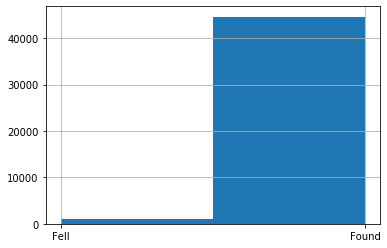

In [5]:
data['fall'].hist(bins=2)  # 
plt.show()

## Box Plot

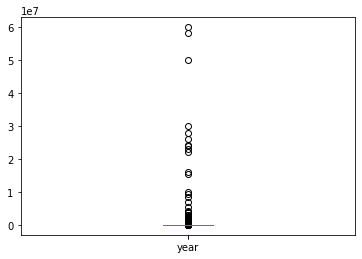

In [6]:
data['mass'].plot.box()
data['year'].plot.box()


## Lat and Long scatter plot, using mass as bubble size

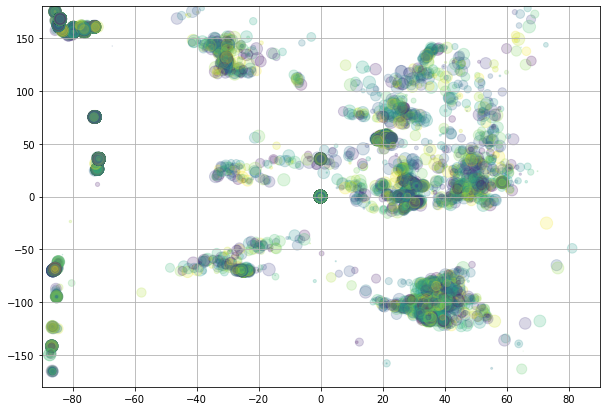

In [7]:
plt.figure(figsize=(10,7))
N = len(data['mass'])
area = (30 * np.random.rand(N))**1.5  # 0 to 15 point radii
colors = np.random.rand(N)
plt.scatter(data['reclat'], data['reclong'], s=area, c=colors, alpha=0.2)
plt.grid(True)
axes = plt.gca()
axes.set_xlim([-90,90])
axes.set_ylim([-180,180])
plt.show()

In [8]:
print(data['year'].value_counts())
# data['recclass'].value_counts().plot(kind='bar')  # bar chart of the amount embarked passengers by class

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1779.0       1
2101.0       1
601.0        1
1820.0       1
1636.0       1
Name: year, Length: 268, dtype: int64


In [9]:
# data['recclass'].value_counts().plot(kind='bar')

print(data['recclass'].value_counts())
# data['recclass'].value_counts().plot(kind='bar')


L6               8285
H5               7142
L5               4796
H6               4528
H4               4211
                 ... 
Stone-ung           1
L3.7-3.9            1
R3.5-4              1
Iron, IIIE-an       1
H/L4-5              1
Name: recclass, Length: 466, dtype: int64


## Time Analysis

In [10]:
data['year'].fillna(0).astype(int)


0        1880
1        1951
2        1952
3        1976
4        1902
         ... 
45711    1990
45712    1999
45713    1939
45714    2003
45715    1976
Name: year, Length: 45716, dtype: int64